# COGS 108 - Final Project 

# Overview

In this project, we examined how GDP, GDP per capita, and HDI (Human Development Index) of various countries affect their suicide mortality rates. We plotted GDP per capita/HDI vs suicide mortality rates of the world as well as for several countries to try and find trends and correlations between them within the world or a nation. We also compared suicide rates between countries based on their GDP, GDP per capita, and HDI to see if the relative wealth of a nation might comparitively affect its suicide rate to other countries. Finally, we used correlation matrices and OLS computation to figure out if GDP and HDI were statistically significant in predicting suicide rates.

# Names

- Seth D'Agostino
- Mikaila Keyes
- Jeffrey Chiu
- Jansen Jia

# Group Members IDs

- A13651408
- A14066254
- A12950096
- A13684931

# Research Question

We aim to explore how the socio-economic factors of a country, specifically GDP, GDP per capita, and HDI, may contribute to the rates of suicide mortality.

## Background and Prior Work

According to the WHO, there are around 800,000 suicides across the world annually, which, if averaged, translates to one lost soul every 40 seconds (1). Astonishingly,  globally among people from 15 to 29 years old, suicide is the second leading cause of death (1). These simple, yet alarming statistics not only reveals a grim reality of the world we live in but also highlights the importance of this project. 

Death by suicide affects people across all spectrums of society. As a characteristic of modern society, no individual of a community is immune from suicide regardless of his or her culture, religion, economy, age, sex, or race. The pervasiveness of suicide could complicate the nature of suicide, but could be untangled by examining suicide against specific variables to identify correlations. Our datasets contain data for various countries across 1985-2016 about suicide rates amongst, age, and generation along with the GDP, GDP per capita, and HDI of the corresponding years. It might be helping in understanding any correlations between the economic development and/or growth of a nation and its national suicide rate. 

Group 021 from winter 2018 looked specifically at the suicide rates among veterans. The result of their study concluded that median threshold income, and not unemployment,  has a strong correlation with the veteran suicide rate. Instead of looking at suicide at a community level in America, we aim to examine suicide at a global scale.  

   (1) Suicide data. (2018, November 05). Retrieved from https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/

# Hypothesis

We believe that GDP per capita and HDI of a country have a relationship with its national suicide mortality rates, with an increase in GDP and HDI leading to a decrease in suicide. Our hypothesis is based on the prediction that in economically underdeveloped nations, there isn’t enough funding, access, and/or awarness of mental health support for the mentally ill, which are usually the most prone to suicide. We are also basing it off of the conclusions made by Group 021 WI18 project (mentioned in the BACKGROUND), that a lower median income might correlate to higher suicide rates. 

# Dataset(s)

The main dataset for our project was accessed through Kaggle and is titled [“Suicide Rates Overview 1985 to 2016: Compares socio-economic info with suicide rates by year and country”](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016). We feel comfortable relying on this dataset alone as it provides an assortment of robust information and variables that we may use in our research, totalling in 27.8k different entries. The information presented in this set is derived from a variety of sources, including the United Nations Development Program, World Bank, and World Health Organization (WHO). We additionally utilized the two WHO datasets, one for “Suicide Mortality by Country” and one containing “Country Metadata”. We later merged the latter two sets and found them to be valuable for their use of three income tiers, and as a comparison to our main dataset. 

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

The following factors are available in the 1985-2016 dataset:

- Country
- Year
- Sex
- Age
- Number of suicides
- Population
- Suicides/100k
- Country year
- HDI (human development index)
- GDP (gross domestic product) 
- GDP per capita
- Generation

We will be utizilizing GDP and HDI as points of comparison for suicide rates. The primary focus will be on exploring the economic side, seeing how GDP and HDI (which includes GDP and more holistically examines how developed a nation is) might implicate decreases in suicide rates as these measures increase or vice versa. 


# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import geopandas as geo

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import patsy
import statsmodels.api as sm

import math
import random

# Data Wrangling

Our primary dataset was from a .csv file titled “suicide-rates-overview-1985-to-2016.csv”, with which we put into a dataframe named “rates_85_16”. There were two other WHO source files (“data/WHO_suicide_mortality_by_country.csv”, “data/WHO_country_metadata.csv”) we loaded into corresponding dataframes named “who_rate_by_country”, “who_country_metadata.”

Our primary dataset “rates_85_16” contained information about various countries’ suicide data for years ranging from 1985 to 2016. The information for each country’s suicide data for a given year focuses on different population groups divided based on the population’s sex, and generation. This dataset contains more comprehensive information on suicide for each countries but has less countries covered than compared to our secondary datasets. 

For our two secondary datasets are “who_rate_by_country”, which contains information on the total suicide rate on 263 countries from 1960s to 2018, and “who_country_metadata,” which classifies each countrry into one of three income groups: low income, lower middle, higher middle, high income. Many values were missing in the table for our secondary data sets. 


In [2]:
rates_85_16 = pd.read_csv("data/suicide-rates-overview-1985-to-2016.csv")
who_rate_by_country = pd.read_csv("data/WHO_suicide_mortality_by_country.csv")
who_country_metadata = pd.read_csv("data/WHO_country_metadata.csv")

In [3]:
rates_85_16.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
who_rate_by_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7,NaN,NaN
2,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7,NaN,NaN
3,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3,NaN,NaN
4,Andorra,AND,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
who_country_metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra


# Data Cleaning

__rates_85_16__

For our dataset “rates_85_16”, we removed the country_year column as this data was repetitive when country and year have their own columns already. In addition we removed commas from GDP for easier processing as numerical values.

In [6]:
rates_85_16 = rates_85_16.drop(columns=['country-year'])
rates_85_16.columns = ["country", "year", "sex", "age", "suicides_no", "population", "suicides_per_100k", "hdi", "gdp", "gdp_per_capita", "generation"]
rates_85_16["gdp"] = rates_85_16["gdp"].apply(lambda x : int(str(x).replace(",", "")))
rates_85_16.head(10)

,country,year,sex,age,suicides_no,population,suicides_per_100k,hdi,gdp,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,2156624900,796,Generation X


__who_rate_by_country__ 

In our set “who_rate_by_country” we removed the indicator name and code columns that contained the same information for the whole column. We only extracted the columns for 2000, 2005, 2010, 2015, and 2016 columns since all the others were blank.

In [7]:
who_rate_by_country = who_rate_by_country[['Country Name','Country Code', '2000', '2005', '2010', '2015', '2016']]
who_rate_by_country.head(10)

,Country Name,Country Code,2000,2005,2010,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,5.700000,6.300000,5.100000,4.800000,4.700000
2,Angola,AGO,7.900000,7.200000,5.700000,5.000000,4.700000
3,Albania,ALB,5.500000,6.700000,7.800000,6.000000,6.300000
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,4.328195,4.312462,4.206429,4.202179,4.266082
6,United Arab Emirates,ARE,3.200000,3.100000,3.000000,2.800000,2.800000
7,Argentina,ARG,9.500000,9.000000,8.700000,8.800000,9.200000
8,Armenia,ARM,3.300000,4.400000,6.000000,7.000000,6.600000
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN


__who_country_metadata:__

For “who_country_metadata” we dropped the “Special Notes” column as it did not contain any valuable or relevant information, as well as an empty and unnamed fifth column. 

In [8]:
who_country_metadata = who_country_metadata.drop(columns=['SpecialNotes'])
who_country_metadata = who_country_metadata.iloc[:,0:4]
who_country_metadata.head(10)

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
5,ARB,NaN,NaN,Arab World
6,ARE,Middle East & North Africa,High income,United Arab Emirates
7,ARG,Latin America & Caribbean,High income,Argentina
8,ARM,Europe & Central Asia,Upper middle income,Armenia
9,ASM,East Asia & Pacific,Upper middle income,American Samoa


__who_rates_by_country__

We merged the two WHO datasets on the Country Code so that we had all that similar sourced data consolidated into one dataframe. We renamed the columns and dropped rows with Nan. And finally, we generated an average suicide rate for every country based on the rate entries in each row. 

In [9]:
who_rates_by_country = pd.merge(who_rate_by_country, who_country_metadata, on="Country Code")
who_rates_by_country = who_rates_by_country.drop(columns=['TableName'])
who_rates_by_country = who_rates_by_country.dropna()
who_rates_by_country.columns = ["country", "code", "2000", "2005", "2010", "2015", "2016", "region", "income_group"]
who_rates_by_country["suicides_per_100k"] = who_rates_by_country.mean(axis = 1)

who_rates_by_country.head(10)

,country,code,2000,2005,2010,2015,2016,region,income_group,suicides_per_100k
1,Afghanistan,AFG,5.7,6.3,5.1,4.8,4.7,South Asia,Low income,5.32
2,Angola,AGO,7.9,7.2,5.7,5.0,4.7,Sub-Saharan Africa,Lower middle income,6.10
3,Albania,ALB,5.5,6.7,7.8,6.0,6.3,Europe & Central Asia,Upper middle income,6.46
6,United Arab Emirates,ARE,3.2,3.1,3.0,2.8,2.8,Middle East & North Africa,High income,2.98
7,Argentina,ARG,9.5,9.0,8.7,8.8,9.2,Latin America & Caribbean,High income,9.04
8,Armenia,ARM,3.3,4.4,6.0,7.0,6.6,Europe & Central Asia,Upper middle income,5.46
10,Antigua and Barbuda,ATG,2.0,1.2,0.3,0.8,0.5,Latin America & Caribbean,High income,0.96
11,Australia,AUS,13.2,12.3,12.5,13.8,13.2,East Asia & Pacific,High income,13.00
12,Austria,AUT,20.0,17.3,16.0,16.0,15.6,Europe & Central Asia,High income,16.98
13,Azerbaijan,AZE,2.2,3.2,3.1,2.7,2.6,Europe & Central Asia,Upper middle income,2.76


# Data Analysis & Results

## Average Suicide Rate (per 100,000 people) Across the World

We wanted to start off with a global geospatial graph that would help us easily visualize the suicide rate for countries in our data set on a global scale. From a simple glance of the geospatial map, we can see that the African and Latin American countries seems to have lowest suicide rates and countries in central Eurasia and Eastern Europe have some of the highest suicide rates. This was surprising and directly challenges our hypothesis as many countries that was traditionally known to be underdeveloped have actually some of the lowest suicide rates. 

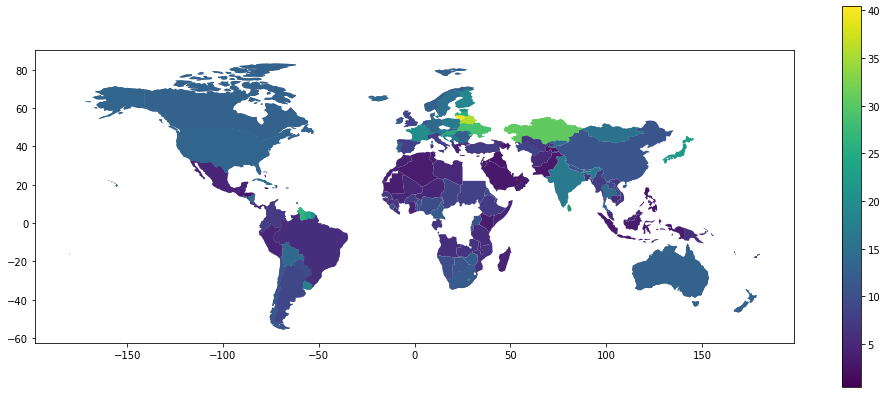

In [10]:
country_stats = rates_85_16.groupby("country").mean().reset_index()
country_stats = country_stats[["country", "suicides_per_100k"]]
who_stats = who_rates_by_country[["country", "suicides_per_100k"]]
merged_stats = pd.concat([country_stats, who_stats])
merged_stats = merged_stats.drop_duplicates()

merged_stats.rename(index=str, columns={"country": "name"}, inplace=True)
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
world_suicide_rates = pd.merge(world, merged_stats, on="name")

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
world_suicide_rates.plot(column='suicides_per_100k', ax=ax, legend=True)

## Global Average GDP per capita vs Global Average Suicides per 100k people (1985-2016)

Viewing the data on a global aggregate level, we plotted average GDP per capita against the average suicide rate per 100k people. In the graph we can see what appears to be a slight inverse correlation, with GDP per capita increasing fairly linearly while suicide rate increases before dramatically decreasing, only to spike up once more in 2015 as GDP takes a small plunge. 

Text(0.5, 0.98, 'Global Average GDP per capita vs Global Average Suicides per 100k people from 1985-2016')

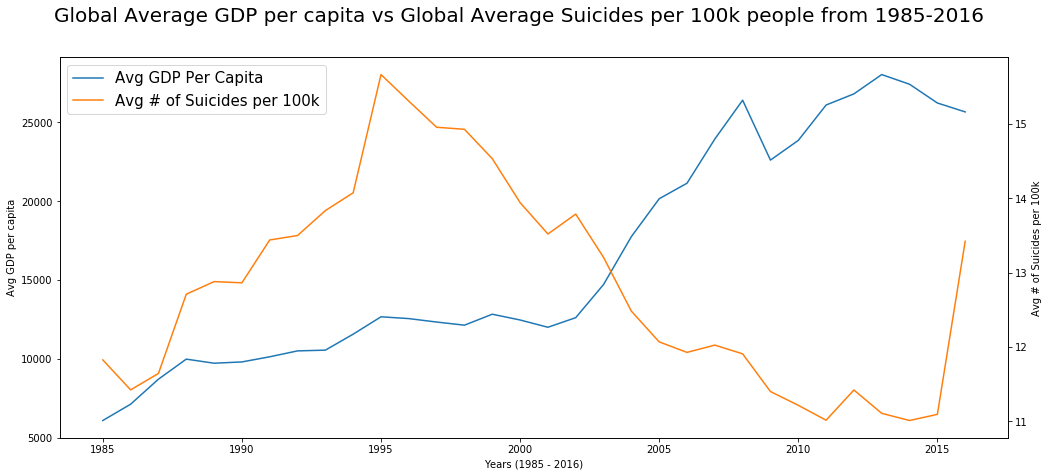

In [11]:
global_stats = rates_85_16.groupby(["year"]).mean().reset_index()

fig, ax1 = plt.subplots(figsize=(17, 7))

color = 'tab:blue'
ax1.set_xlabel('Years (1985 - 2016)')
ax1.set_ylabel('Avg GDP per capita')
line1 = ax1.plot(global_stats["year"], global_stats["gdp_per_capita"], color=color, label="Avg GDP Per Capita")

ax2 = ax1.twinx()

color = "tab:orange"
ax2.set_ylabel('Avg # of Suicides per 100k')
line2 = ax2.plot(global_stats["year"], global_stats["suicides_per_100k"], color=color, label="Avg # of Suicides per 100k")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0,prop={'size':15})
fig.suptitle("Global Average GDP per capita vs Global Average Suicides per 100k people from 1985-2016", fontsize=20)

Looking at their relationship in a scatterplot form, we see a strong grouping of suicide rates within a GDP per capita range of 10,000-15,000, and a fairly strong linear decrease in suicide rate as GDP increases. 

Text(0.5, 0.98, 'Global Average GDP per capita vs Global Average Suicides per 100k people')

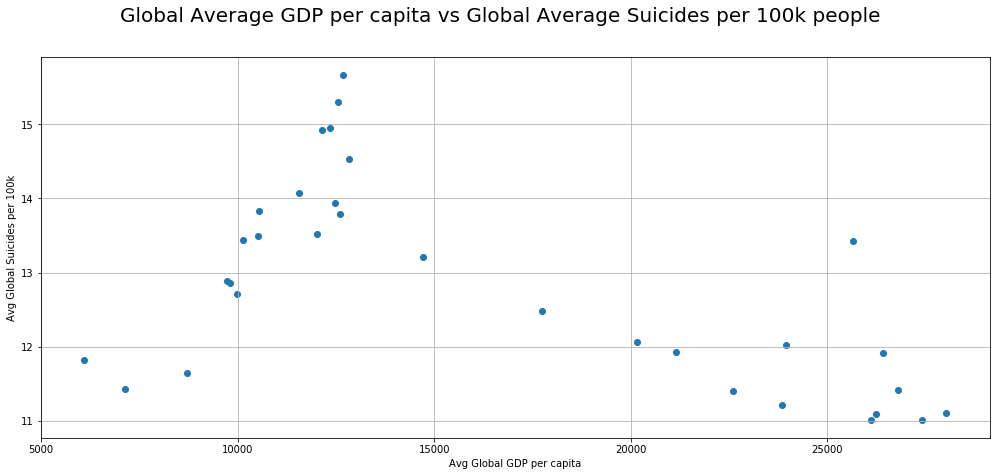

In [12]:
fig, ax1 = plt.subplots(figsize=(17, 7))
ax1.set_xlabel('Avg Global GDP per capita')
ax1.set_ylabel('Avg Global Suicides per 100k')
ax1.scatter(global_stats["gdp_per_capita"], global_stats["suicides_per_100k"])
plt.grid(True)
fig.suptitle("Global Average GDP per capita vs Global Average Suicides per 100k people", fontsize=20)

## Global Average HDI vs Global Average Suicides per 100k people (1985-2016)

We next explored a comparison between the same average suicide rate per 100k data and the HDI data. Human Development Index (HDI) is a score assigned to a country based on life expectancy, education, income per capita. Similarly to the GDP per capita comparison, HDI has a strong positive linear growth while suicide rates peak briefly before decreasing steadily. These two variables seem to share the slight inverse relationship that GDP per capita and suicide rate has. The scatter plot visualization strongly resembles that of the GDP per capita plot. 



Text(0.5, 0.98, 'Global Average HDI vs Global Average Suicides per 100k people from 1985-2016')

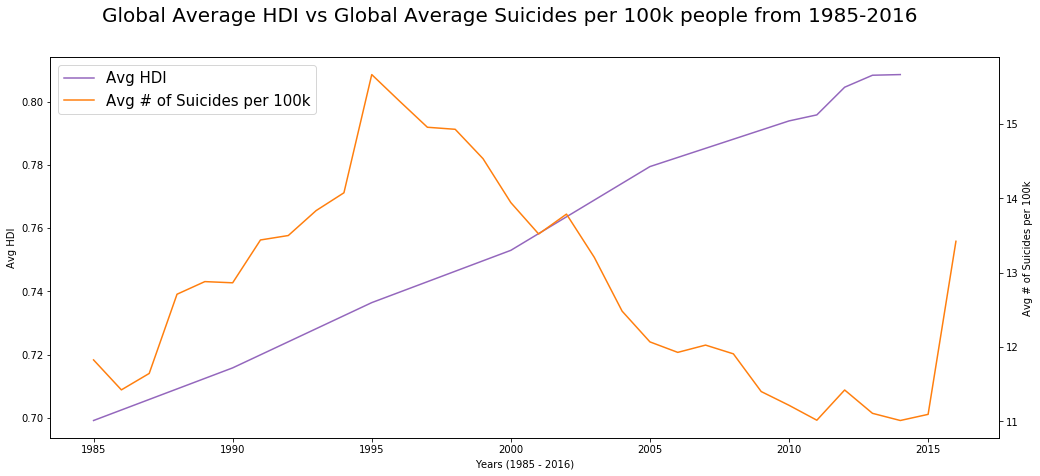

In [13]:
HDI_suicide_df = rates_85_16.drop(columns=["sex", "age", "population", "suicides_no", "gdp", "gdp_per_capita", "generation"])
HDI_suicide_df.dropna(axis=0, inplace=True)

df_suicide_hdi_annual= pd.DataFrame(columns=('year', 'hdi', 'suicide_rate'))
year_group = HDI_suicide_df.groupby('year')

for year,row in year_group:
    df_suicide_hdi_annual = df_suicide_hdi_annual.append({'year': year,
                                                            'hdi': np.mean(row.drop_duplicates(subset="country", keep='first', inplace=False)['hdi']),
                                                            'suicide_rate' : np.mean(row['suicides_per_100k'])}, ignore_index=True)
    
fig, ax1 = plt.subplots(figsize=(17, 7))

color = 'tab:purple'
ax1.set_xlabel('Years (1985 - 2016)')
ax1.set_ylabel('Avg HDI')
line1 = ax1.plot(df_suicide_hdi_annual["year"], df_suicide_hdi_annual["hdi"], color=color, label="Avg HDI")
ax1.legend(loc=0)

ax2 = ax1.twinx()

color = "tab:orange"
ax2.set_ylabel('Avg # of Suicides per 100k')
line2 = ax2.plot(global_stats["year"], global_stats["suicides_per_100k"], color=color, label="Avg # of Suicides per 100k")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0, prop={'size':15})
fig.suptitle("Global Average HDI vs Global Average Suicides per 100k people from 1985-2016", fontsize=20)

Text(0.5, 0.98, 'Global Average HDI per capita vs Global Average Suicides per 100k people')

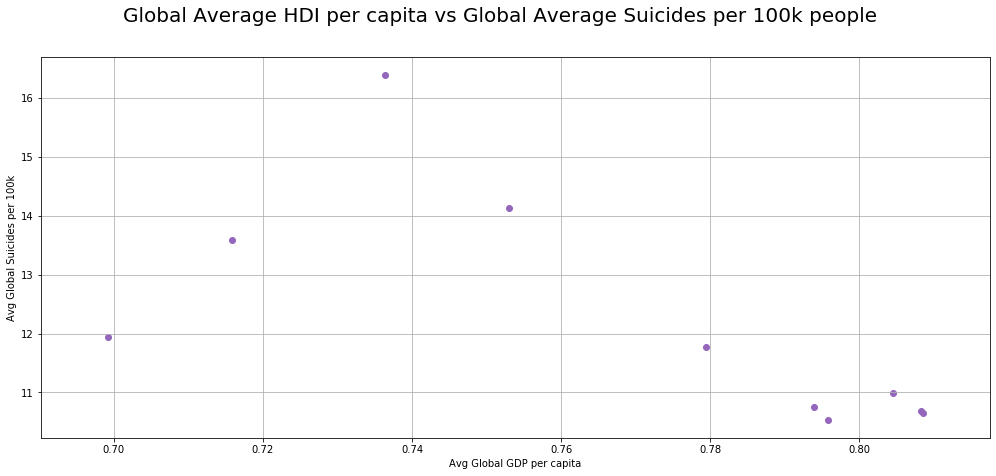

In [14]:
fig, ax1 = plt.subplots(figsize=(17, 7))
ax1.set_xlabel('Avg Global GDP per capita')
ax1.set_ylabel('Avg Global Suicides per 100k')
ax1.scatter(df_suicide_hdi_annual["hdi"], df_suicide_hdi_annual["suicide_rate"], color="tab:purple")
plt.grid(True)
fig.suptitle("Global Average HDI per capita vs Global Average Suicides per 100k people", fontsize=20)

## Country Avg GDP vs Country Avg Suicide Rate 

Next, moving beyond examining the relationship at a global level, we created a graph to visualize the relationship between average GDP and average suicide rate for countries with different income levels. The average GDP and average suicide rate was calculated from all the average GDP and suicide rates over the years 1985 to 2016. The three different income levels were represented by three different colors. 

Surprisingly, the lowest income tier is not represented as having the highest suicide rates. In fact it looks like that high income countries tend to be represented as having higher suicide rates then the other tiers. This, once again, like the geospatial map, shows us a trend that is counter to our hypothesis.


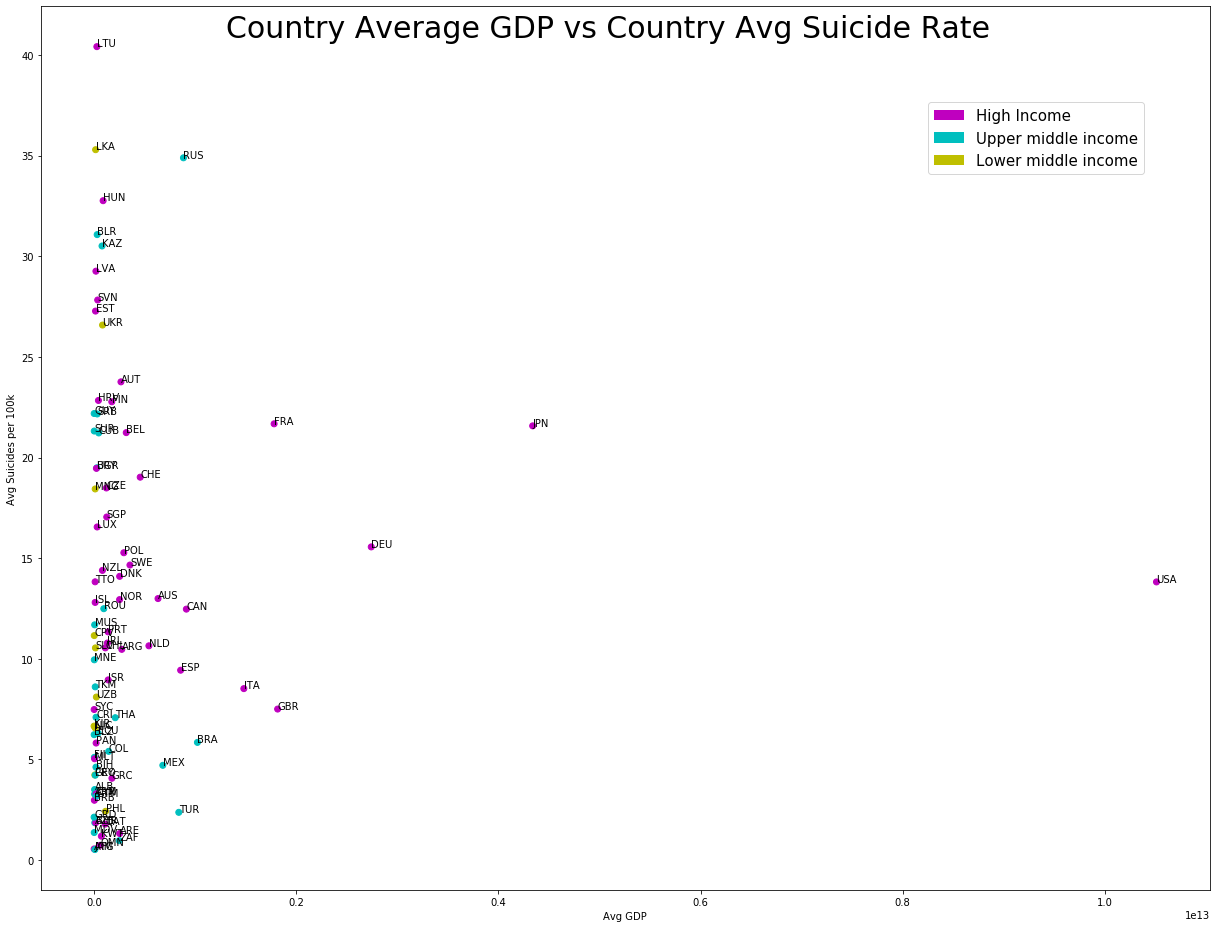

In [15]:
def income_group_to_number(income_group):
    i_dict = {'High income' : 'm',
              'Upper middle income' : 'c',  
              'Lower middle income' : 'y' }
    return i_dict[income_group]

country_data = rates_85_16.groupby("country").mean().reset_index()
who_data = who_rates_by_country[['country', 'code', 'region', 'income_group']]
country_data = pd.merge(who_data, country_data, on="country")
country_data["income_group_num"] = country_data["income_group"].apply(income_group_to_number)

fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg GDP')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["gdp"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "gdp"], country_data.loc[i, "suicides_per_100k"]))

recs = []
colors = ['m', 'c', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["High Income", "Upper middle income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average GDP vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## Country Avg GDP per Capita vs Country Avg Suicide Rate

We then used the same visualization but with GDP per capita. This gives us a much cleaner look at the individual countries and their placement on the graph. We can now see that high income countries are fairly evenly spread in terms of rate of suicide, while Lower Middle Income contries are still grouped mostly on the lower end of suicide rates.

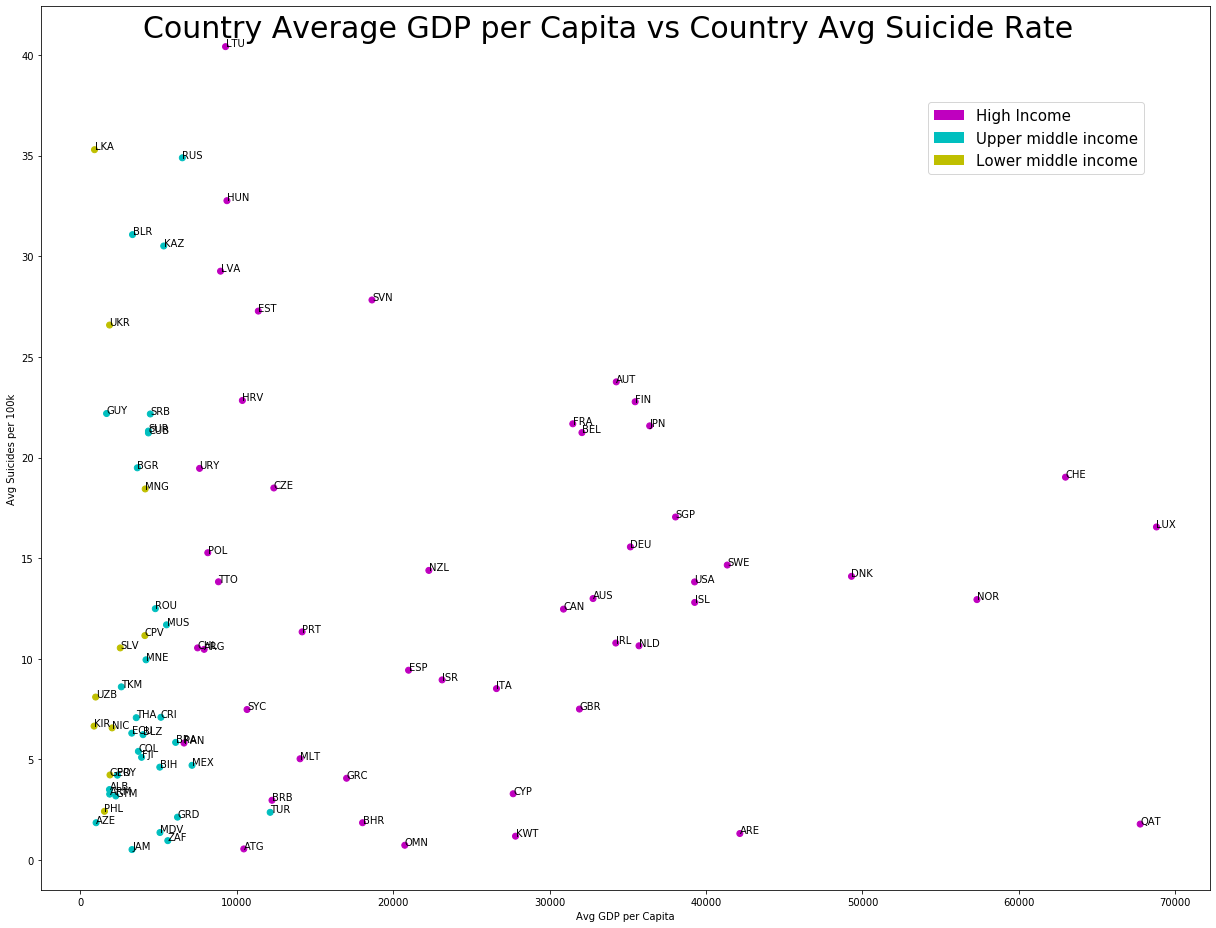

In [16]:
fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg GDP per Capita')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["gdp_per_capita"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "gdp_per_capita"], country_data.loc[i, "suicides_per_100k"]))
    
recs = []
colors = ['m', 'c', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["High Income", "Upper middle income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average GDP per Capita vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## Country Avg HDI vs Country Avg Suicide Rate 

We also looked at average HDI against average suicide rate for different income group countries. This graph shows that low income countries have low HDI and high income countries have higher HDI, which is as expected.  However, we see that high income countries is spread out throughout having many different suicide rates with the main grouping in the 10-25 suicide per 10k range, while the upper middle income countries group mainly lower in the 0 to 10 suicide per 10k range. The lower middle income group has very few data, but the data we dp have shows that the grouped to the bottom with notable anomalies such as Ukraine exceeding 25 suicide per 10k.

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


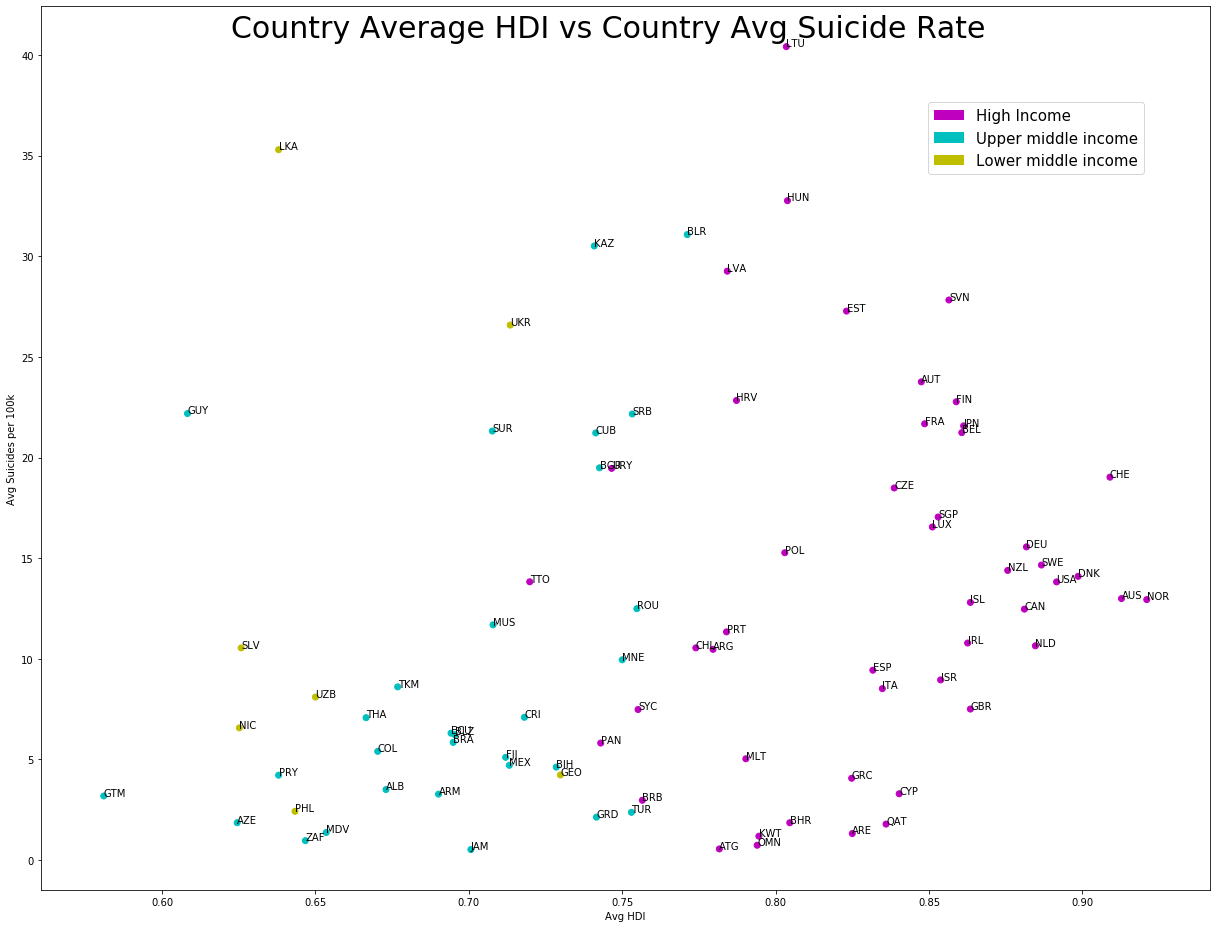

In [17]:
fig, ax1 = plt.subplots(figsize=(17, 13))

# Name of countries
ax1.set_xlabel('Avg HDI')
ax1.set_ylabel('Avg Suicides per 100k')
ax1.scatter(country_data["hdi"], country_data["suicides_per_100k"], c=country_data["income_group_num"])

for i, name in enumerate(country_data["code"].tolist()):
    ax1.annotate(name, (country_data.loc[i, "hdi"], country_data.loc[i, "suicides_per_100k"]))
    
recs = []
colors = ['m', 'c', 'y']
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,["High Income", "Upper middle income", "Lower middle income"],loc=1,prop={'size':15}, bbox_to_anchor=(.95, .90))    

fig.suptitle("Country Average HDI vs Country Avg Suicide Rate", fontsize=30)
fig.tight_layout()
plt.subplots_adjust(wspace = 1.0)
plt.show()

## A Closer Look at Three Countries

We wanted to examine some of the countries in our set a bit more closely, and particularly to see how GDP isn’t as effective for predicting suicide rates as we expected. We chose three specific countries to see how they all portray the range of differing results we got. 

1. Austria is a perfect example of our expectations. There is a strong linear path for both GDP and suicide rates, and a very clear inverse relationship: as GDP increase, suicide rate decreases. However, this is not representative of what our aggregate results and other specific examples told us. 


2. The Bahamas is an example of how extraneous factors might effect suicide rates, and other variables might be better related to the rates. GDP rises dramatically before plateauing, with little change in most recent years. Suicide rates seem to fluctuate, with a startling spike around 2010 that is clearly not explained by GDP. 


3. Brazil directly contradicts our hypothesis with strong positive linear path for both GDP and suicide rates. This visualization suggests that increases in GDP is instead a better indication for increases in suicide rates. However, based on our aggregate data and our measure of statistical significance (which we discuss below), this example is not accurate either.


In [18]:
countries = ["Austria", "Bahamas", "Brazil"]

## GDP per capita vs Suicide per 100k and HDI vs Suicide per 100k for each Country

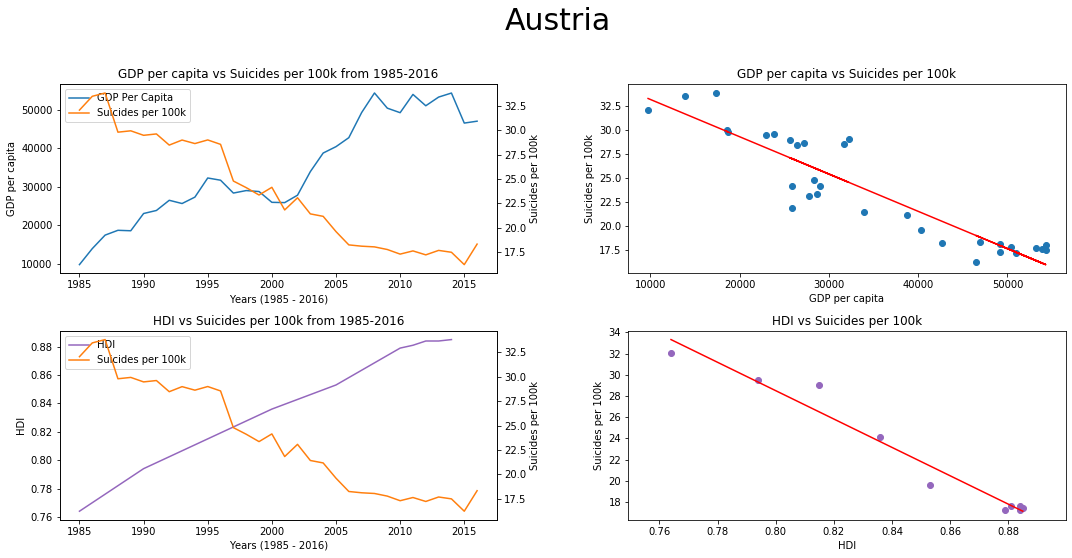

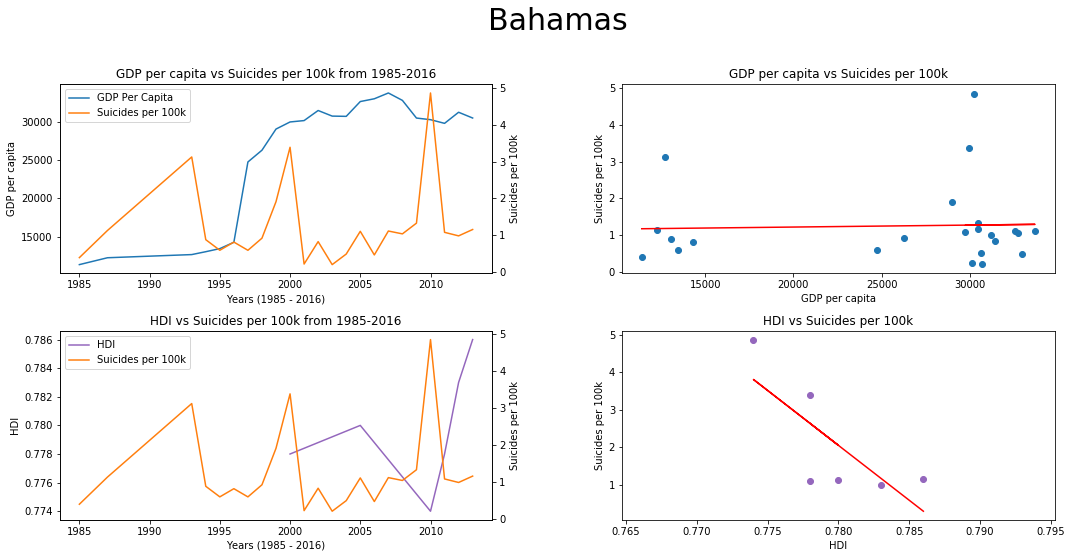

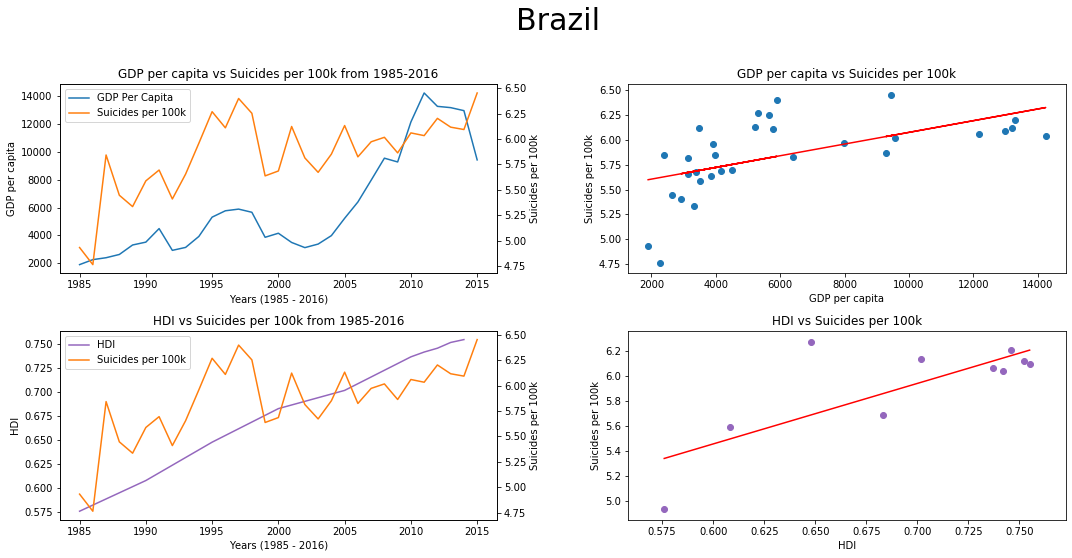

In [19]:
def plot_suicide_vs_gdp_and_hdi_per_year(country):
    fig, axes = plt.subplots(2, 2, figsize=(15, 7))
    
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[1, 0]
    ax4 = axes[1, 1]
    
    # Top row for gdp
    data = rates_85_16[rates_85_16["country"] == country]
    suicide_gdp_per_year = data.groupby(["year"]).mean().reset_index()
    
    color = 'tab:blue'
    ax1.set_xlabel('Years (1985 - 2016)')
    ax1.set_ylabel('GDP per capita')
    line1 = ax1.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["gdp_per_capita"], color=color, label="GDP Per Capita")
    ax1.legend(loc=0)

    ax5 = ax1.twinx()
    
    color = "tab:orange"
    ax5.set_ylabel('Suicides per 100k')
    line2 = ax5.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["suicides_per_100k"], color=color, label="Suicides per 100k")

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc=0)
    ax1.title.set_text('GDP per capita vs Suicides per 100k from 1985-2016')

    #----------------------------------------------------------------------------------
    ax2.set_xlabel('GDP per capita')
    ax2.set_ylabel('Suicides per 100k')
    ax2.scatter(suicide_gdp_per_year["gdp_per_capita"], suicide_gdp_per_year["suicides_per_100k"])
    
    a1, b1 = np.polyfit(suicide_gdp_per_year['gdp_per_capita'], suicide_gdp_per_year['suicides_per_100k'], 1)
    
    gdp_per_cap = suicide_gdp_per_year['gdp_per_capita'].values
    
    predicted_suicide = []
    for x in gdp_per_cap:
        predicted_suicide.append(a1 * x + b1)
        
    ax2.plot(gdp_per_cap, predicted_suicide, c='red')
    
    ax2.title.set_text('GDP per capita vs Suicides per 100k')
    
    ###################################################################################
    
    # Bottom row for hdi
    HDI_suicide_df = data.drop(columns=["sex", "age", "population", "suicides_no", "gdp", "gdp_per_capita", "generation"])
    HDI_suicide_df.dropna(axis=0, inplace=True)

    df_suicide_hdi_annual= pd.DataFrame(columns=('year', 'hdi', 'suicide_rate'))
    year_group = HDI_suicide_df.groupby('year')

    for year,row in year_group:
        df_suicide_hdi_annual = df_suicide_hdi_annual.append({'year': year,
                                                                'hdi': np.mean(row.drop_duplicates(subset="country", keep='first', inplace=False)['hdi']),
                                                                'suicide_rate' : np.mean(row['suicides_per_100k'])}, ignore_index=True)
    
    color = 'tab:purple'
    ax3.set_xlabel('Years (1985 - 2016)')
    ax3.set_ylabel('HDI')
    line3 = ax3.plot(df_suicide_hdi_annual["year"], df_suicide_hdi_annual["hdi"], color=color, label="HDI")
    ax3.legend(loc=0)

    ax6 = ax3.twinx()
    
    color = "tab:orange"
    ax6.set_ylabel('Suicides per 100k')
    line4 = ax6.plot(suicide_gdp_per_year["year"], suicide_gdp_per_year["suicides_per_100k"], color=color, label="Suicides per 100k")

    bot_lines = line3 + line4
    labels = [l.get_label() for l in bot_lines]
    ax3.legend(bot_lines, labels, loc=0)
    ax3.title.set_text('HDI vs Suicides per 100k from 1985-2016')

    #---------------------------------------------------------------------------------
    ax4.set_xlabel('HDI')
    ax4.set_ylabel('Suicides per 100k')
    ax4.scatter(df_suicide_hdi_annual["hdi"], df_suicide_hdi_annual["suicide_rate"], c="tab:purple")
    ax4.title.set_text('HDI vs Suicides per 100k')
    
    a2, b2 = np.polyfit(df_suicide_hdi_annual["hdi"], df_suicide_hdi_annual["suicide_rate"], 1)
    
    hdi = df_suicide_hdi_annual["hdi"].values
    
    predicted_suicide = []
    for x in hdi:
        predicted_suicide.append(a2 * x + b2)
        
    ax4.plot(hdi, predicted_suicide, c='red')
    
    ##################################################################################
    
    fig.suptitle(country, x= .52, y = 1.1, fontsize=30)
    fig.tight_layout()
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
    
for country in countries:
    plot_suicide_vs_gdp_and_hdi_per_year(country)

## % Change in GDP per Capita vs % Change in Suicides per 100k for each country 

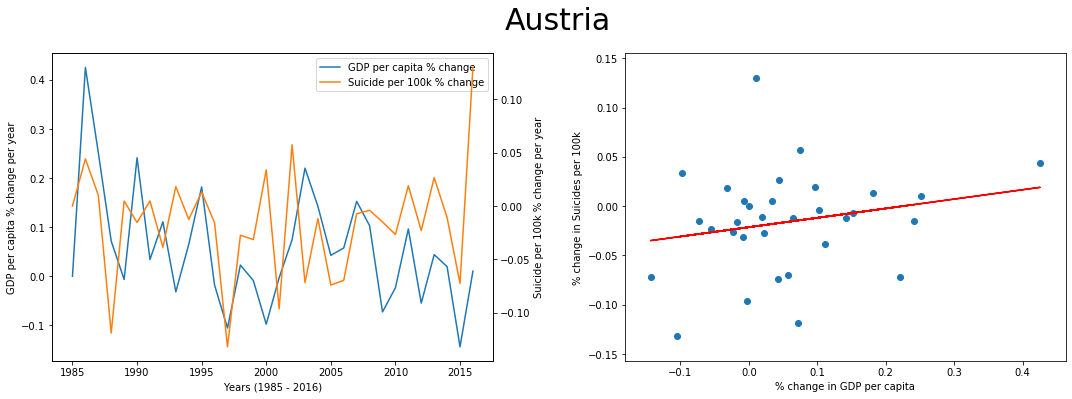

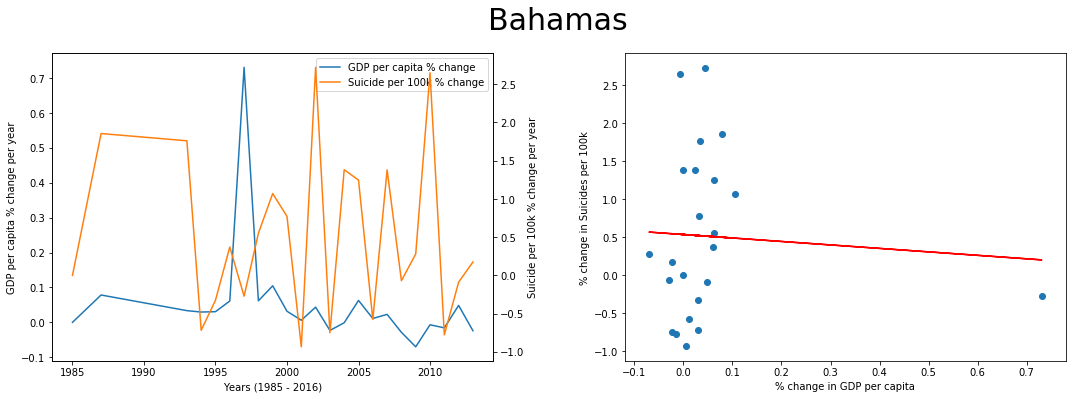

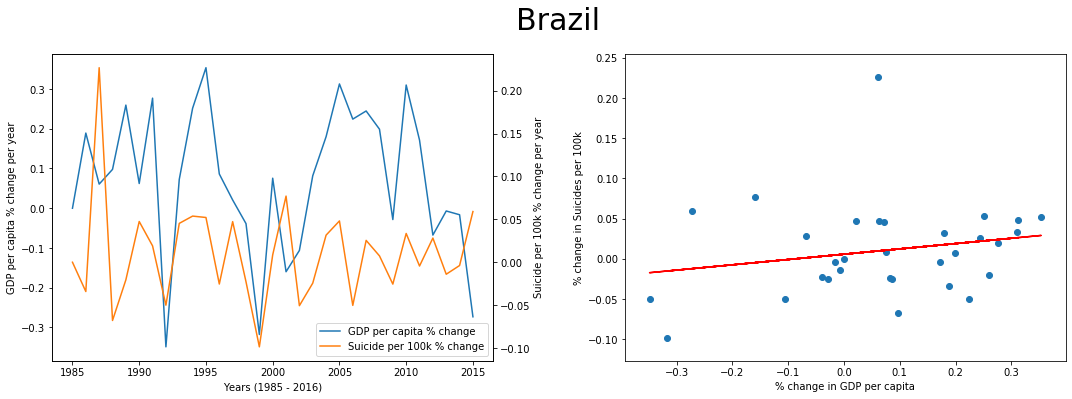

In [20]:
def percent_change(before, after):
    if before != 0:
        return (after - before) / before
    else:
        return 0

def percent_change_across_list(input_list):
    result = []
    for index, value in enumerate(input_list):
        if index == 0:
            result.append(0)
        else:
            result.append(percent_change(input_list[index - 1], value))
    return result

def percent_change_in_gdp_vs_suicide_per_year(country):
    data = rates_85_16[rates_85_16["country"] == country]
    suicide_gdp_per_year = data.groupby(["year"]).mean().reset_index()
    
    gdp_per_year = suicide_gdp_per_year["gdp_per_capita"].tolist()
    gdp_change_per_year = percent_change_across_list(gdp_per_year)
    
    suicides_per_year = suicide_gdp_per_year["suicides_per_100k"].tolist()
    suicides_change_per_year = percent_change_across_list(suicides_per_year)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    color = 'tab:blue'
    ax1.set_xlabel('Years (1985 - 2016)')
    ax1.set_ylabel('GDP per capita % change per year')
    line1 = ax1.plot(suicide_gdp_per_year["year"], gdp_change_per_year, color=color, label="GDP per capita % change")
    ax1.legend(loc = 0)
    
    ax3 = ax1.twinx()
    
    color = "tab:orange"
    ax3.set_ylabel('Suicide per 100k % change per year')
    line2 = ax3.plot(suicide_gdp_per_year["year"], suicides_change_per_year, color=color, label="Suicide per 100k % change")

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc=0)

    ax2.set_xlabel('% change in GDP per capita')
    ax2.set_ylabel('% change in Suicides per 100k')
    ax2.scatter(gdp_change_per_year, suicides_change_per_year)
    
    a1, b1 = np.polyfit(gdp_change_per_year, suicides_change_per_year, 1)
    
    predicted_suicide = []
    for x in gdp_change_per_year:
        predicted_suicide.append(a1 * x + b1)
        
    ax2.plot(gdp_change_per_year, predicted_suicide, c='red')
    
    fig.suptitle(country, x= .52, y = 1.1, fontsize=30)
    fig.tight_layout()
    plt.subplots_adjust(wspace = 0.3)
    plt.show()
            
for country in countries:
    percent_change_in_gdp_vs_suicide_per_year(country)  


# Evaluation

We created a chart with all the correlation and p-values for every country we analyzed. We also summarized the correlation and p-value between GDP and suicide rate as well as HDI and suicide rate for all countries which will give us an idea of if GDP and HDI’s effect of suicide rate on a global scale. 

In [21]:
def calculate_p_gdp_sui(country):
    df = rates_85_16[rates_85_16["country"] == country]
    outcome_1, predictors_1 = patsy.dmatrices("suicides_per_100k~gdp_per_capita", df)
    mod_1 = sm.OLS(outcome_1, predictors_1)
    res_1 = mod_1.fit()
    
    return res_1.pvalues[1]

def calculate_p_hdi_sui(country):
    df = rates_85_16[rates_85_16["country"] == country]
    try:
        outcome_1, predictors_1 = patsy.dmatrices("suicides_per_100k~hdi", df)
        mod_1 = sm.OLS(outcome_1, predictors_1)
        res_1 = mod_1.fit()

        return res_1.pvalues[1]
    except:
        return None

def is_p_value_significant(p_value):
    if math.isnan(p_value):
        pass
    elif p_value <= .01:
        return 1
    else:
        return 0
    
def get_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

def calculate_gdp_correlation(country):
    df = rates_85_16[rates_85_16["country"] == country]
    return get_correlation(df["gdp_per_capita"], df["suicides_per_100k"])
    
def calculate_hdi_correlation(country):
    df = rates_85_16[rates_85_16["country"] == country]
    return get_correlation(df["hdi"].ffill(), df["suicides_per_100k"])

def correlation_label(corr):
    result = ""
    if abs(corr) >= .8:
        result = result + "Very Strong"
    elif abs(corr) >= .6:
        result = result + "Strong"
    elif abs(corr) >= .4:
        result = result + "Moderate"
    elif abs(corr) >= .2:
        result = result + "Weak"
    else:
        result = result + "Very Weak"
    
    if corr > 0:
        result = result + " Positive"
    elif corr < 0:
        result = result + " Negative"
    else:
        result = "Zero"
        
    return result

eval_df = pd.DataFrame({"country": rates_85_16["country"].unique()})

eval_df["gdp/capita_pvalue"] = eval_df["country"].apply(calculate_p_gdp_sui)
eval_df["gdp/capita_significant"] = eval_df["gdp/capita_pvalue"].apply(is_p_value_significant)
eval_df["gdp/capita_corr"] = eval_df["country"].apply(calculate_gdp_correlation)
eval_df["gdp/capita_to_suicide_rate"] = eval_df["gdp/capita_corr"].apply(correlation_label)

eval_df

,country,gdp/capita_pvalue,gdp/capita_significant,gdp/capita_corr,gdp/capita_to_suicide_rate
0,Albania,4.967562e-01,0.0,-0.042008,Very Weak Negative
1,Antigua and Barbuda,5.913860e-01,0.0,0.029933,Very Weak Positive
2,Argentina,1.474270e-01,0.0,-0.075257,Very Weak Negative
3,Armenia,7.919575e-01,0.0,-0.015343,Very Weak Negative
4,Aruba,3.119107e-02,0.0,-0.166315,Very Weak Negative
5,Australia,6.246499e-02,0.0,-0.098292,Very Weak Negative
6,Austria,2.012744e-04,1.0,-0.189100,Very Weak Negative
7,Azerbaijan,4.312123e-01,0.0,-0.057132,Very Weak Negative
8,Bahamas,8.219739e-01,0.0,0.013605,Very Weak Positive
9,Bahrain,3.837341e-01,0.0,-0.055102,Very Weak Negative


In [22]:
eval_hdi = pd.DataFrame({"country": rates_85_16["country"].unique()})

eval_hdi["hdi_pvalue"] = eval_hdi["country"].apply(calculate_p_hdi_sui)
eval_hdi["hdi_significant"] = eval_hdi["hdi_pvalue"].apply(is_p_value_significant)
eval_hdi["hdi_corr"] = eval_hdi["country"].apply(calculate_hdi_correlation)
eval_hdi["hdi_to_suicide_rate"] = eval_hdi["hdi_corr"].apply(correlation_label)

eval_hdi

,country,hdi_pvalue,hdi_significant,hdi_corr,hdi_to_suicide_rate
0,Albania,0.278917,0.0,NaN,Zero
1,Antigua and Barbuda,NaN,NaN,NaN,Zero
2,Argentina,0.445861,0.0,-0.055764,Very Weak Negative
3,Armenia,0.365829,0.0,0.008243,Very Weak Positive
4,Aruba,NaN,NaN,NaN,Zero
5,Australia,0.344927,0.0,NaN,Zero
6,Austria,0.015568,0.0,-0.197054,Very Weak Negative
7,Azerbaijan,0.984227,0.0,NaN,Zero
8,Bahamas,0.043176,0.0,NaN,Zero
9,Bahrain,0.354576,0.0,0.058698,Very Weak Positive


The histograms below shows the distribution of the correlation between the average GDP and suicide rate as well as the average HDI and suicide rate. For suicide rate’s relationship with GDP, most countries’ correlation registers as “very weakly negative correlation.” This means, although very weakly correlated, as GDP climbs there is a minimal drop in suicide rate for most countries. 

For suicide rate’s relationship with HDI, most countries’ correlation registers as “zero”, a result of the lack of data. But from the data we do have, more countries have “very weakly negative correlation.” Similarly, this means that higher HDI is correlated with a lower suicide rate by, albeit, a very minimal amount for most countries. 

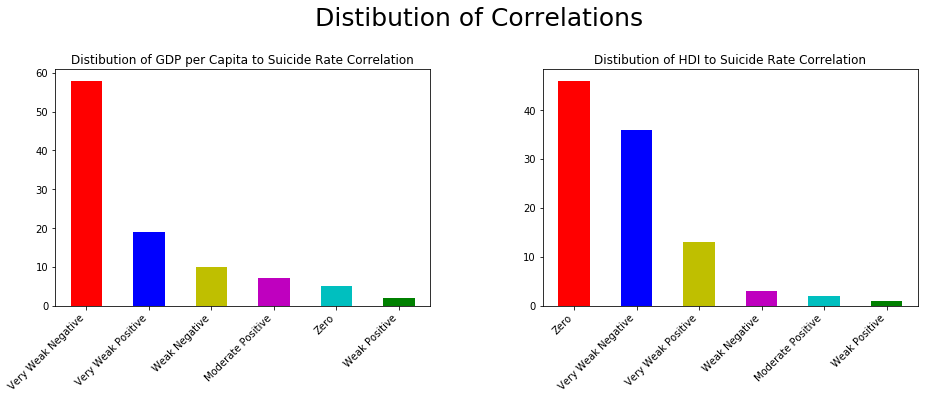

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
eval_df["gdp/capita_to_suicide_rate"].value_counts().plot('bar', ax=ax1, 
                                                          title="Distibution of GDP per Capita to Suicide Rate Correlation",
                                                          color=['r', 'b', 'y', 'm', 'c', 'g'])
eval_hdi["hdi_to_suicide_rate"].value_counts().plot('bar', ax=ax2, 
                                                          title="Distibution of HDI to Suicide Rate Correlation",
                                                          color=['r', 'b', 'y', 'm', 'c', 'g'])
ax1.set_xticklabels(eval_df["gdp/capita_to_suicide_rate"].unique(), rotation=45, ha='right')
ax2.set_xticklabels(eval_hdi["hdi_to_suicide_rate"].unique(), rotation=45, ha='right')

fig.suptitle("Distibution of Correlations", x= .52, y = 1.1, fontsize=25)
fig.tight_layout()
plt.subplots_adjust(wspace = 0.3)
plt.show()

### General Results

In [24]:
eval_df.mean(skipna = True) 

gdp/capita_pvalue         0.192425
gdp/capita_significant    0.414141
gdp/capita_corr          -0.051067
dtype: float64

In [25]:
eval_hdi.mean(skipna = True)

hdi_pvalue         0.308714
hdi_significant    0.101124
hdi_corr          -0.049297
dtype: float64

For predicting __Suicide Rate from GDP__, the average p-value is 0.192, which is > 0.01 and is therefore not significant. For all the countries, on average, GDP prediction of Suicide Rate is 41% successful. Finally, the average correlation with GDP per capita and suicide rate is Very Weakly Negative (-0.051).

For predicting __Suicide Rate from HDI__, the average p-value is 0.309, which is > 0.01 and is therefore not significant. For all the countries, on average, HDI prediction of Suicide Rate is 10% successful. Finally, the average correlation with HDI and suicide rate is Very Weakly Negative (-0.049).

# Ethics & Privacy

It is important for us to keep the ethical considerations in mind. Considering the sensitivity surrounding suicide, it is important to us that we maintain the privacy and anonymity of the victims and the victims’ families during this project. We will ensure that none of our data can be used to reveal the identities of the participants.

We will also not take any stance or judgement on the rightness or wrongness of the suicides studied in this project or on any suicides for that matter. Nor will we claim to understand the motivations of the victims of suicide, as they all differ case-by-case, individual-to-individual.

When interpreting the analysis and conclusion drawn from the data, it is important to keep in mind the limitation and incomprehensiveness of our data. Some other specific limitations with our data were also started at the end of our analysis section,  Therefore, the conclusion drawn from this project could only at most be applied to the data we analyzed. So when we use words such as “global,” it is a convenient, obvious generalization. 

Most suicide attempts do not register in success so the scale of the suicide epidemic and issue regarding suicide is much bigger than what our data suggests. Therefore it is important to reconsider that the question we are asking specifically identifies suicide mortality as what we are investigating. 
	
Furthermore, it is important to recognize that the conclusion drawn from our project could potentially be used to make unrealistic or untrue assumptions about certain countries. It could also instill stigma against underdeveloped or developed nations that did not exist. All of these effects would not only be a distortion of facts but also harm the interests of people suffering from suicidal thoughts. The conclusions and analysis does not attempt to provide a complete picture of suicidal behavior.


# Conclusion & Discussion

It is important when looking at our analysis and data itself that there are many shortcomings and confounding factors. For one, we have a noticeable lack of data in two major ways. There are countries missing from our primary dataset, meaning that our aggregate results are not accurate. There is also a lack of data for countries in the lower income group, meaning our assessment of country averages in GDP and suicide rates is likely skewed. Most importantly, our data and analysis in no way is able to account for the variety of complex socio-cultural and historical factors that every individual country has. Our goal was to investigate if one factor has the potential of being related to suicide rates, NOT that it is the reason for such. 
	
Based on our overall analysis, we cannot conclude that our hypothesis is correct. It is apparent that there is a slight, weak, negative correlation between GDP and suicide mortality rates, but this weak connection matched with our limitations means that there is a need for future research into this to be able to draw more accurate conclusions. 